In [19]:
# Polynomial Features

# Polynomial Features

In [20]:
!python --version

Python 3.9.6


In [21]:
import numpy as np
import matplotlib.pyplot as plt

np.set_printoptions(precision=2)
from common import run_gradient_descent,zscore_normalize

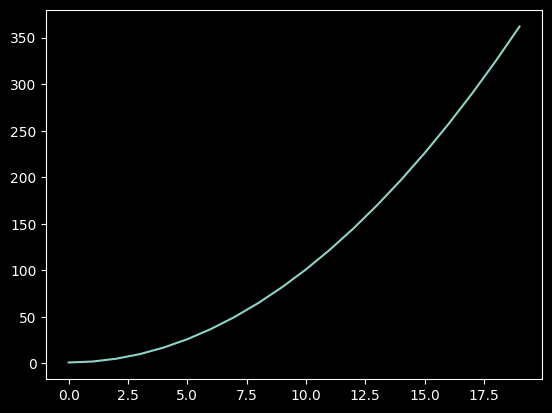

In [22]:
# draw Polynomial
x = np.arange(0,20,1)
y = 1 + x**2
X = x.reshape(-1,1)

plt.plot(x,y)
plt.show()

Iteration    0: Cost  1657.56
Iteration  100: Cost   694.55
Iteration  200: Cost   588.48
Iteration  300: Cost   526.41
Iteration  400: Cost   490.10
Iteration  500: Cost   468.86
Iteration  600: Cost   456.43
Iteration  700: Cost   449.16
Iteration  800: Cost   444.90
Iteration  900: Cost   442.41
b,w found by gradient descent: -52.08,[18.7] 


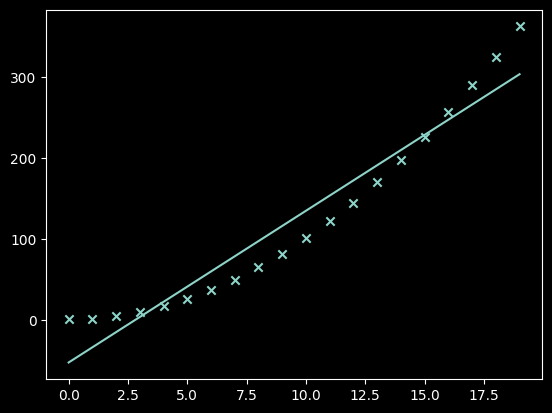

In [23]:
# try line regression
model_w,model_b,history = run_gradient_descent(X, y, 0.01,1000)
predict_y = x * model_w + model_b

plt.scatter(x,y,marker='x')
plt.plot(x,predict_y)
plt.show()

# check

Iteration    0: Cost  7329.22
Iteration 1000: Cost     0.22
Iteration 2000: Cost     0.22
Iteration 3000: Cost     0.22
Iteration 4000: Cost     0.22
Iteration 5000: Cost     0.22
Iteration 6000: Cost     0.21
Iteration 7000: Cost     0.21
Iteration 8000: Cost     0.21
Iteration 9000: Cost     0.21
b,w found by gradient descent: 0.05,[1.] 


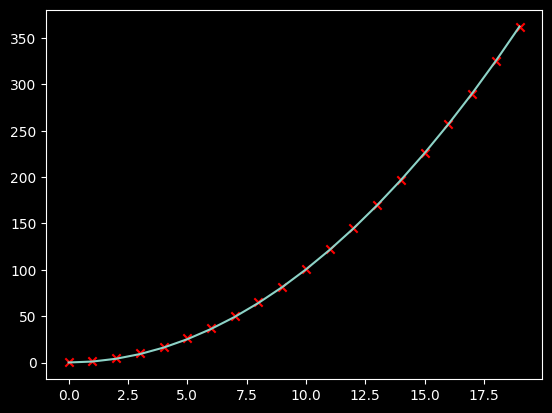

In [24]:
X_2 = x ** 2
X = X_2.reshape(-1,1)

model_w,model_b,history = run_gradient_descent(X, y, 1e-5, 10000)
predict_y = X.dot(model_w) + model_b

plt.scatter(x,y,marker='x',color='red')
plt.plot(x,predict_y)
plt.show()

## select features.

Iteration    0: Cost  1140.29
Iteration 1000: Cost   328.54
Iteration 2000: Cost   280.44
Iteration 3000: Cost   239.39
Iteration 4000: Cost   204.34
Iteration 5000: Cost   174.43
Iteration 6000: Cost   148.90
Iteration 7000: Cost   127.10
Iteration 8000: Cost   108.49
Iteration 9000: Cost    92.61
b,w found by gradient descent: 0.01,[0.08 0.54 0.03] 


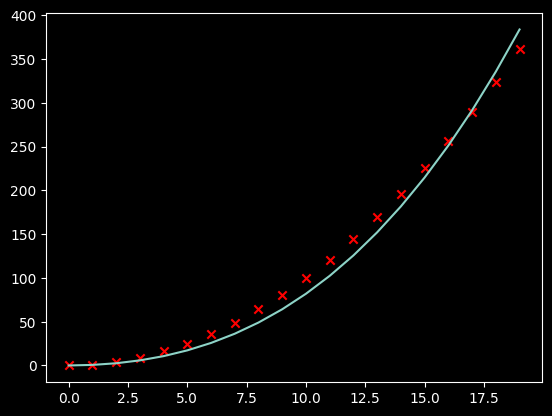

In [25]:
x = np.arange(0,20,1)
y = x ** 2
X = np.c_[x, x**2, x**3]

model_w,model_b,history = run_gradient_descent(X, y, 1e-7, 10000)

predict_y = X.dot(model_w) + model_b

plt.scatter(x,y,marker='x',color='red')
plt.plot(x,predict_y)
plt.show()

- less weight value implies less important/correct feature

## use z-scored features.

x np.ptp(X,axis=0) = [  19  361 6859]
X_norm np.ptp(X,axis=0) = [3.3  3.18 3.28]
Iteration    0: Cost  9421.47
Iteration 10000: Cost     0.39
Iteration 20000: Cost     0.03
Iteration 30000: Cost     0.00
Iteration 40000: Cost     0.00
Iteration 50000: Cost     0.00
Iteration 60000: Cost     0.00
Iteration 70000: Cost     0.00
Iteration 80000: Cost     0.00
Iteration 90000: Cost     0.00
b,w found by gradient descent: 123.50,[5.27e-05 1.13e+02 8.43e-05] 


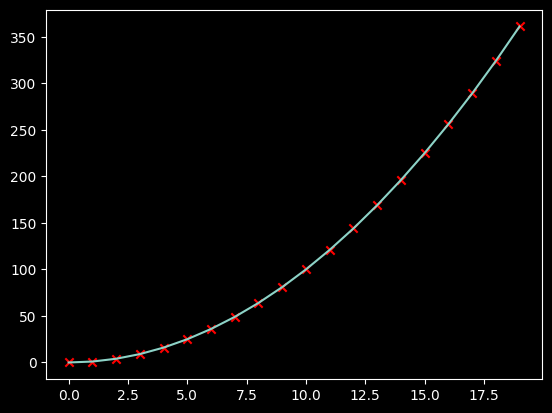

9.00000420216432


In [31]:
x = np.arange(0,20,1)
y = x**2
X = np.c_[x, x**2, x**3]


X_norm, mu, sigma = zscore_normalize(X)
print("x np.ptp(X,axis=0) =",np.ptp(X,axis=0))
print("X_norm np.ptp(X,axis=0) =",np.ptp(X_norm,axis=0))

model_w,model_b,history = run_gradient_descent(X_norm, y, 1e-1, 100000)
predict_y = X_norm.dot(model_w) + model_b

plt.scatter(x,y,marker='x',color='red')
plt.plot(x,predict_y)
plt.show()

intput_x = np.array([3,9,27])
input_norm = (intput_x - mu) / sigma
input_predict = np.dot(input_norm,model_w) + model_b

print(input_predict)